In [144]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

!pip install stockstats
from stockstats import StockDataFrame as Sdf

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [0]:
data1 = pd.read_csv("AAPL.csv")
data2 = pd.read_csv("FB.csv")
data3 = pd.read_csv("TSLA.csv")

In [0]:
stock1 = Sdf.retype(data1)
stock2 = Sdf.retype(data2)
stock3 = Sdf.retype(data3)

In [147]:
for i in range(20, 51):
  data1['rsi' + str(i)] = stock1['rsi_' + str(i)]
  data2['rsi' + str(i)] = stock2['rsi_' + str(i)]
  data3['rsi' + str(i)] = stock3['rsi_' + str(i)]
  if i % 10 == 1:
    print(i // 10)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2
3
4


In [148]:
data1.head()

,open,high,low,close,adj close,volume,close_-1_s,close_-1_d,rs_20,rsi_20,...,rsi47,rs_48,rsi_48,rsi48,rs_49,rsi_49,rsi49,rs_50,rsi_50,rsi50
date,,,,,,,,,,,,,,,,,,,,,
2018-12-04,180.949997,182.389999,176.270004,176.690002,176.690002,41344300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-06,171.759995,174.779999,170.419998,174.720001,174.720001,43098400,176.690002,-1.970001,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-07,173.490005,174.490005,168.300003,168.490005,168.490005,42281600,174.720001,-6.229996,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-10,165.000000,170.089996,163.330002,169.600006,169.600006,62026000,168.490005,1.110001,0.144223,12.604448,...,12.205181,0.138942,12.199183,12.199183,0.138867,12.193435,12.193435,0.138795,12.187921,12.187921
2018-12-11,171.660004,171.789993,167.000000,168.630005,168.630005,47281700,169.600006,-0.970001,0.127331,11.294873,...,11.005806,0.123613,11.001418,11.001418,0.123560,10.997212,10.997212,0.123509,10.993175,10.993175


In [0]:
scores1 = []
scores2 = []
scores3 = []
coefs1 = []
coefs2 = []
coefs3 = []

In [150]:
for i in range(20, 51):
  X1 = data1['rsi' + str(i)].shift(10).dropna()
  y1 = data1['adj close'][11:]
  X2 = data2['rsi' + str(i)].shift(10).dropna()
  y2 = data2['adj close'][11:]
  X3 = data3['rsi' + str(i)].shift(10).dropna()
  y3 = data3['adj close'][11:]
   
  lr1 = LinearRegression()
  lr2 = LinearRegression()
  lr3 = LinearRegression()
  
  lr1.fit(X1.values.reshape(-1, 1), y1.values.reshape(-1, 1))
  lr2.fit(X2.values.reshape(-1, 1), y2.values.reshape(-1, 1))
  lr3.fit(X3.values.reshape(-1, 1), y3.values.reshape(-1, 1))
  
  coefs1.append(lr1.coef_[0])
  coefs2.append(lr2.coef_[0])
  coefs3.append(lr3.coef_[0])
  
  score1 = cross_val_score(lr1, X1.values.reshape(-1, 1), y1.values.reshape(-1, 1), cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
  score2 = cross_val_score(lr2, X2.values.reshape(-1, 1), y2.values.reshape(-1, 1), cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
  score3 = cross_val_score(lr3, X3.values.reshape(-1, 1), y2.values.reshape(-1, 1), cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
  
  scores1.append(score1.mean())
  scores2.append(score2.mean())
  scores3.append(score3.mean())
  
  if i % 10 == 0:
    print(i // 10)

2
3
4
5


In [151]:
scores1

[-67.1983081652604,
 -67.1890268083108,
 -67.18059200893089,
 -67.17288377453158,
 -67.16580525203585,
 -67.15927716315333,
 -67.15323381066497,
 -67.14762015598828,
 -67.14238964254443,
 -67.1375025483262,
 -67.13292472061016,
 -67.12862659111126,
 -67.1245824000325,
 -67.12076957785976,
 -67.1171682477981,
 -67.11376082154985,
 -67.11053166810616,
 -67.10746684021578,
 -67.10455384684099,
 -67.10178146260155,
 -67.09913956719444,
 -67.09661900929916,
 -67.09421149061437,
 -67.09190946655447,
 -67.08970606081455,
 -67.08759499155241,
 -67.08557050733839,
 -67.08362733137491,
 -67.08176061273834,
 -67.07996588361405,
 -67.07823902166949]

<Container object of 31 artists>

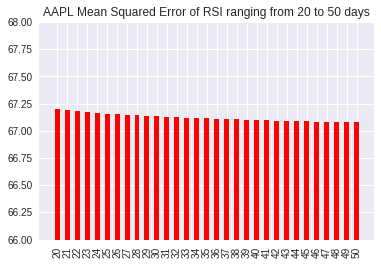

In [152]:
axes = plt.gca()
axes.set_ylim([66, 68])
plt.xticks(rotation=90)
plt.title("AAPL Mean Squared Error of RSI ranging from 20 to 50 days")
plt.bar([str(i) for i in range(20, 51)], [abs(a) for a in scores1], width=.5, color='red')

In [153]:
scores2

[-2757.9573802514424,
 -2771.873314108688,
 -2785.6161832908647,
 -2799.1650442945697,
 -2812.501203115887,
 -2825.6079709548803,
 -2838.4704519172847,
 -2851.0753623125956,
 -2863.410878835699,
 -2875.4665118599773,
 -2887.23299978832,
 -2898.702220573202,
 -2909.8671169104246,
 -2920.7216320974385,
 -2931.260654046958,
 -2941.479965416055,
 -2951.376198229665,
 -2960.9467917379325,
 -2970.1899525495555,
 -2979.1046163324672,
 -2987.690410574827,
 -2995.947618060157,
 -3003.877140836407,
 -3011.480464556036,
 -3018.7596231376942,
 -3025.7171637541237,
 -3032.3561121894536,
 -3038.6799386350167,
 -3044.692524008923,
 -3050.398126893085,
 -3055.801351183732]

<Container object of 31 artists>

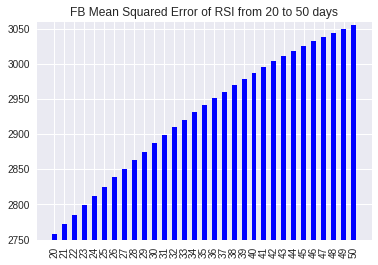

In [154]:
axes = plt.gca()
axes.set_ylim([2750, 3060])
plt.xticks(rotation=90)
plt.title("FB Mean Squared Error of RSI from 20 to 50 days")
plt.bar([str(i) for i in range(20, 51)], [abs(a) for a in scores2], width=.5, color='blue')

In [155]:
scores3

[-2564.735560532986,
 -2569.797980871029,
 -2575.1613207937976,
 -2580.8135677744003,
 -2586.741381351617,
 -2592.930375088749,
 -2599.3653756612557,
 -2606.030657633397,
 -2612.910153678446,
 -2619.9876408065966,
 -2627.2469036809694,
 -2634.6718764047873,
 -2642.2467643162977,
 -2649.9561473813255,
 -2657.785066762238,
 -2665.719096091925,
 -2673.744398909287,
 -2681.84777362992,
 -2690.016687339338,
 -2698.2392996100675,
 -2706.5044774607913,
 -2714.801802496132,
 -2723.1215711901496,
 -2731.4547892047985,
 -2739.7931605665303,
 -2748.1290724591568,
 -2756.4555763292274,
 -2764.7663659407385,
 -2773.05575295939,
 -2781.318640592285,
 -2789.5504957572575]

<Container object of 31 artists>

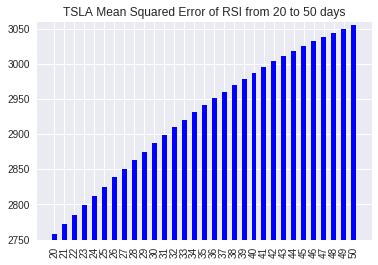

In [156]:
axes = plt.gca()
axes.set_ylim([2750, 3060])
plt.xticks(rotation=90)
plt.title("TSLA Mean Squared Error of RSI from 20 to 50 days")
plt.bar([str(i) for i in range(20, 51)], [abs(a) for a in scores2], width=.5, color='blue')

**Conclusion** 

            RSI is not a very good indicator unless the stock has very low voltality (but most of the time, RSI is a *terrible* indicator).
            
            If the stock doesn't have a very high voltality, then the number of days used for RSI doesn't really matter.  However most of the time, the less days that are used for RSI, the better.  
            
            ***DISCLAIMER***: RSI is a very bad indicator due to it being overused by traders.